# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs 

In [2]:
import cftime
import scipy

In [3]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

import quick_map
from load_ensembles import *

# Load data

In [57]:
dir_input='/glade/work/czarakas/coupled_PPE/data/data_for_figures/EOFs/'
eofs_P=xr.open_dataset(dir_input+'EOFanalysis_calculated_PREC_FROM_ATM_coupled_EOFs.nc')
pcs_P=xr.open_dataset(dir_input+'EOFanalysis_calculated_PREC_FROM_ATM_coupled_PCs.nc')
var_explained_P=xr.open_dataset(dir_input+'EOFanalysis_calculated_PREC_FROM_ATM_coupled_varianceFraction.nc')

eofs_Ts=xr.open_dataset(dir_input+'EOFanalysis_TSKIN_coupled_EOFs.nc')
pcs_Ts=xr.open_dataset(dir_input+'EOFanalysis_TSKIN_coupled_PCs.nc')
var_explained_Ts=xr.open_dataset(dir_input+'EOFanalysis_TSKIN_coupled_varianceFraction.nc')

In [65]:
dir_input='/glade/work/czarakas/coupled_PPE/data/data_for_figures/annual_means/'

pvals_P=xr.open_dataset(dir_input+'pval_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')#['pval']
ds_array_P=xr.open_dataset(dir_input+'delta_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')
ds_ref_P=xr.open_dataset(dir_input+'ref_calculated_PREC_FROM_ATM_Annual_mean_coupled.nc')#['calculated_PREC_FROM_ATM']

pvals_Ts=xr.open_dataset(dir_input+'pval_TSKIN_Annual_mean_coupled.nc')#['pval']
ds_array_Ts=xr.open_dataset(dir_input+'delta_TSKIN_Annual_mean_coupled.nc')
ds_ref_Ts=xr.open_dataset(dir_input+'ref_TSKIN_Annual_mean_coupled.nc')#['calculated_PREC_FROM_ATM']

In [66]:
from load_gridcell_areas import *

In [68]:
EOF0_Ts_pcs=pcs_Ts.pcs[:,0]
EOF0_P_pcs=pcs_P.pcs[:,0]

delta_Ts_global_land=(ds_array_Ts['TSKIN']*landweights2).sum(dim=['lat','lon'])
delta_P_global_land=(ds_array_P['calculated_PREC_FROM_ATM']*landweights2).sum(dim=['lat','lon'])*(86400*365)

In [118]:
mod_factor_Ts=-2*np.std(EOF0_Ts_pcs)
mod_factor_P=2*np.std(EOF0_P_pcs)

In [119]:
EOF0_Ts=eofs_Ts.eofs[:,:,0]*mod_factor_Ts/landweights
EOF0_P=eofs_P.eofs[:,:,0]*mod_factor_P/landweights

In [120]:
from plotting_settings import *

/glade/u/home/czarakas/coupled_PPE/code/utils/quick_map.py:87: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(clim)


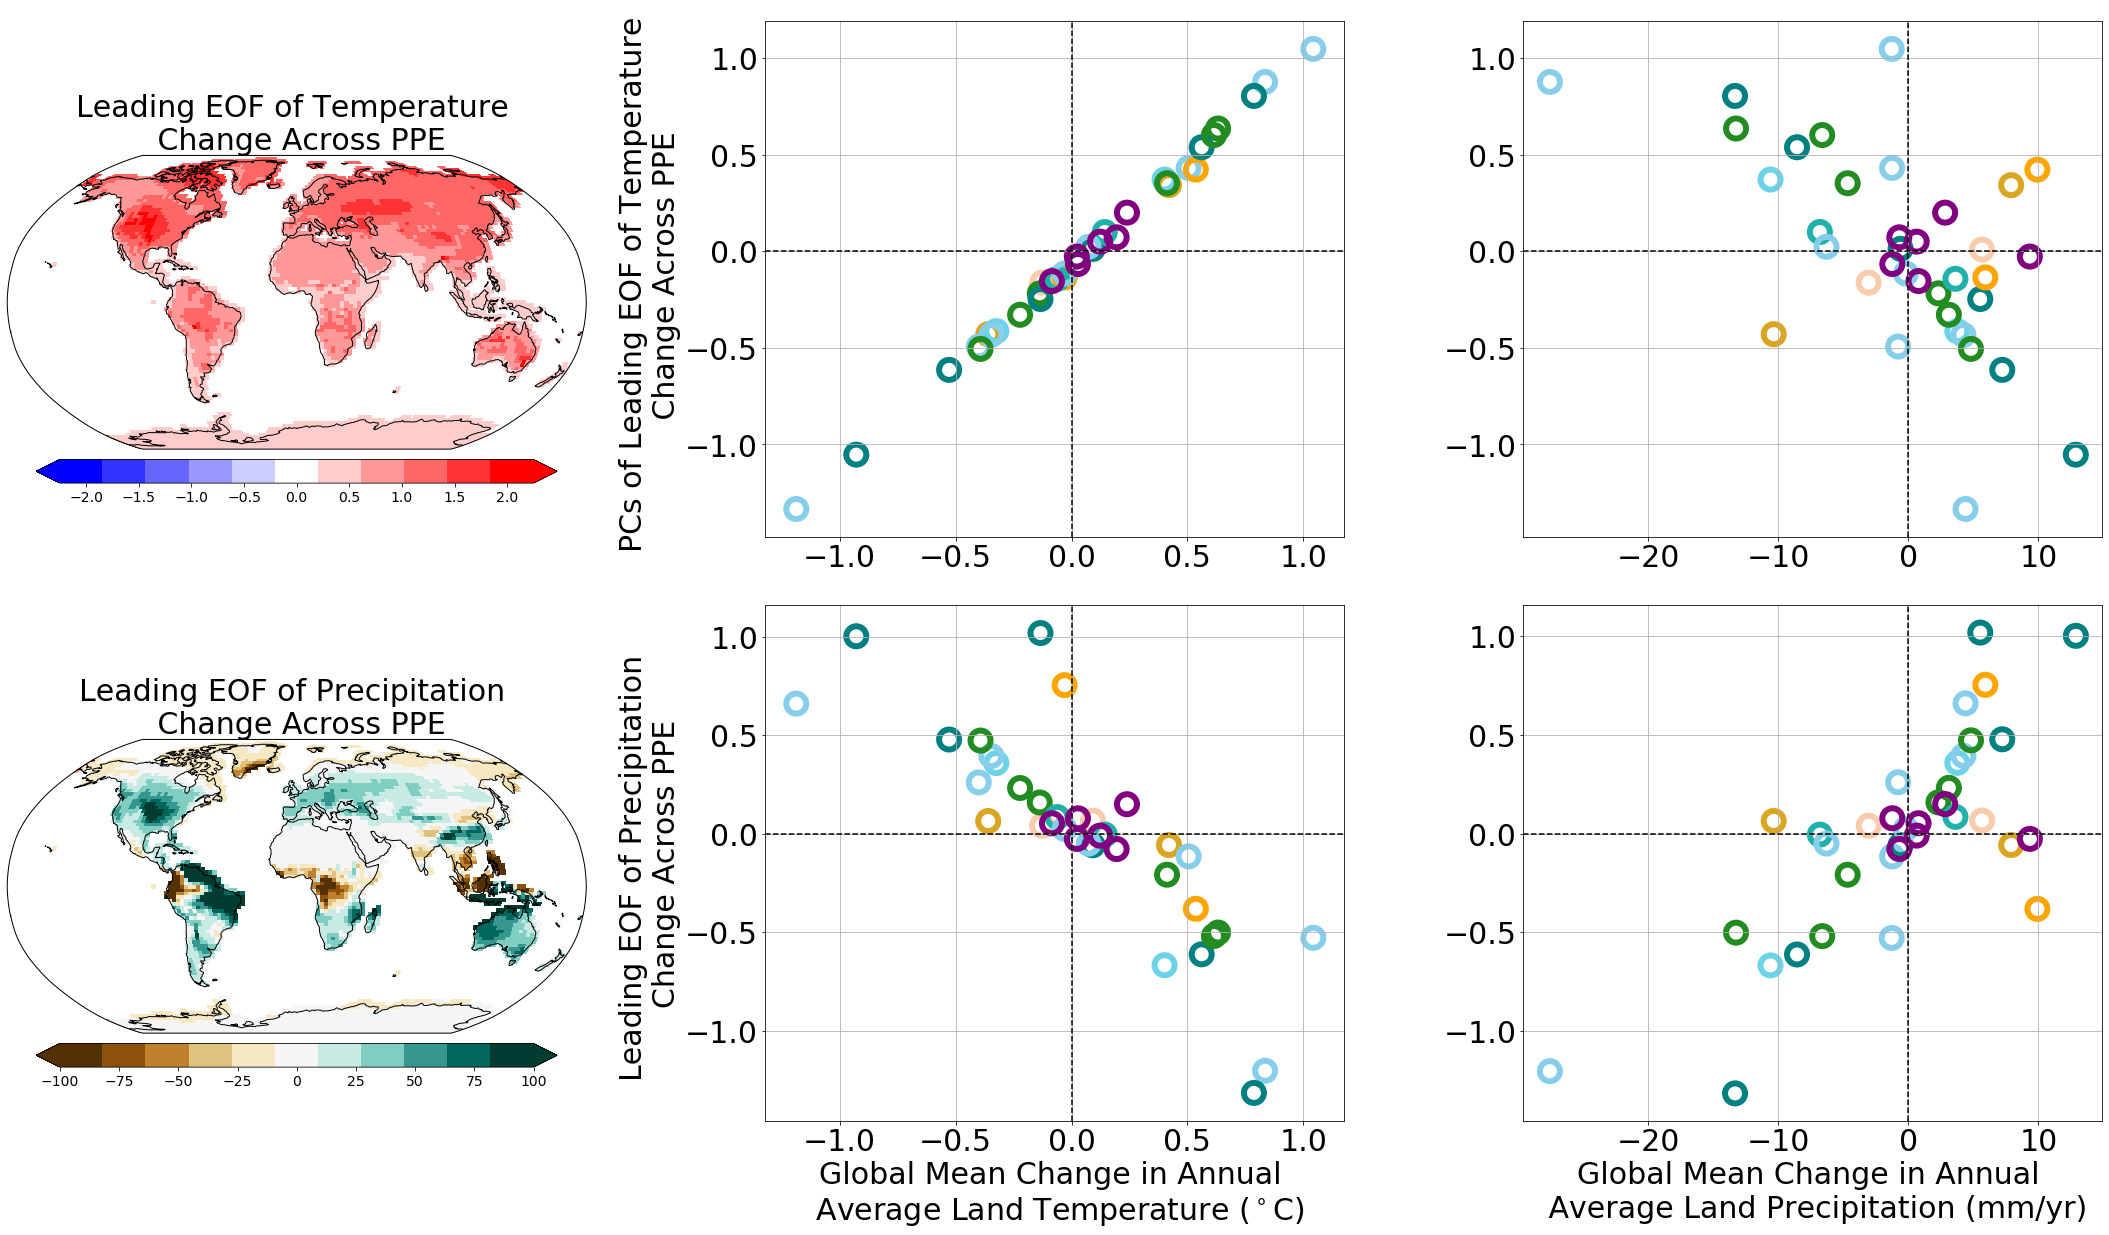

In [126]:
plt.figure(figsize=(30,18))
plt.rcParams.update({'font.size': 30})

plt.subplot(2,3,1)
quick_map.quick_map_subplot(EOF0_Ts.values,
                            EOF0_Ts.lat,
                            EOF0_Ts.lon, nrow=2, ncol=3, ind=0,
                                clim=[-2.25,2.25], cmap=plt.get_cmap('bwr',11))
plt.title('Leading EOF of Temperature \n Change Across PPE',fontsize=30)

plt.subplot(2,3,2)
plt.scatter(delta_Ts_global_land, EOF0_Ts_pcs/mod_factor_Ts, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
plt.grid()
#plt.xlabel('Global Mean Change in Annual \n Average Land Temperature')
plt.ylabel('PCs of Leading EOF of Temperature \n Change Across PPE')

plt.subplot(2,3,3)
plt.scatter(delta_P_global_land, EOF0_Ts_pcs/mod_factor_Ts, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
plt.grid()
#plt.xlabel('Global Mean Change in Annual \n Average Land Precipitation')
#plt.ylabel('Leading EOF of Temperature \n Change Across PPE')

plt.subplot(2,3,4)
quick_map.quick_map_subplot(EOF0_P.values,
                            EOF0_P.lat,
                            EOF0_P.lon, nrow=2, ncol=3, ind=3,
                                clim=[-100,100], cmap=plt.get_cmap('BrBG',11))
plt.title('Leading EOF of Precipitation \n Change Across PPE',fontsize=30)

plt.subplot(2,3,5)
plt.scatter(delta_Ts_global_land, EOF0_P_pcs/mod_factor_P, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)

plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
plt.grid()
plt.xlabel('Global Mean Change in Annual \n Average Land Temperature ($^\circ$C)')
plt.ylabel('Leading EOF of Precipitation \nChange Across PPE')
plt.tight_layout()

plt.subplot(2,3,6)
plt.scatter(delta_P_global_land, EOF0_P_pcs/mod_factor_P, s=400, 
            edgecolors=colors,facecolors='none',linewidth=6)
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
plt.grid()
plt.xlabel('Global Mean Change in Annual \n Average Land Precipitation (mm/yr)')
#plt.ylabel('Leading EOF of Precipitation \n Change Across PPE')

plt.tight_layout()
plt.savefig('Figures/Figure_S_Correlation_between_EOFs_and_global_mean_changes.pdf')